#### Sleep Health and Lifestyle 

In the data we are considering the following Dataset Columns:
*Person ID: An identifier for each individual.
*Gender: The gender of the person (Male/Female).
*Age: The age of the person in years.
*Occupation: The occupation or profession of the person.
*Sleep Duration (hours): The number of hours the person sleeps per day.
*Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
*Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
*Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
*BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
*Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
*Heart Rate (bpm): The resting heart rate of the person in beats per minute.
*Daily Steps: The number of steps the person takes per day.
*Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

#### Loading and preparing the data

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [127]:
# Loading the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Configurar Pandas para que se ajuste al futuro comportamiento de downcasting
pd.set_option('future.no_silent_downcasting', True)

# Display first few rows of the DataFrame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [128]:
df.columns = df.columns.str.strip()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Checking the shape of the data**

In [130]:
df.shape

(374, 13)

**Checking data types**

In [131]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

**Checking for missing values**

In [132]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

**Solve null values in Sleep Disorder**

In [133]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna(0)

In [134]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

#### Data Preprocessing

**Categorical columns**

In [135]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [136]:
for col in df.columns:
    try:
        df[col].astype(float)
    except ValueError as e:
        print(f"Error converting {col}: {e}")

Error converting Gender: could not convert string to float: 'Male'
Error converting Occupation: could not convert string to float: 'Software Engineer'
Error converting BMI Category: could not convert string to float: 'Overweight'
Error converting Blood Pressure: could not convert string to float: '126/83'
Error converting Sleep Disorder: could not convert string to float: 'Sleep Apnea'


In [137]:
df["Person ID"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [138]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [139]:
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [140]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [141]:
df["BMI Category"] = df["BMI Category"].str.replace("Normal Weight",'Normal')

In [142]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [143]:
df["Blood Pressure"].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [144]:
df["Sleep Disorder"].unique()

array([0, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [145]:
# Drop unnecesary columns
df.drop(columns=['Person ID', 'Occupation'], inplace=True)

# BMI Category label encoding
df["BMI Category"] = df["BMI Category"].replace({'Normal': 0, 'Overweight': 1, 'Obese': 2})

# Sleep Disorder label encoding
df["Sleep Disorder"] = df["Sleep Disorder"].replace({0: 0, 'Insomnia': 1, 'Sleep Apnea': 2}).astype(int)

# Gender label encoding
df["Gender"] = df["Gender"].map({'Female': 0, 'Male': 1})


In [146]:
"""
# Split the "Blood Pressure" column into two numerical columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert them to integers
df['Systolic_BP'] = df['Systolic_BP'].astype(int)
df['Diastolic_BP'] = df['Diastolic_BP'].astype(int)
"""

# Drop the original "Blood Pressure" column
df.drop(columns=['Blood Pressure'], inplace=True)

# Drop the original "Sleep Disorder" column
df.drop(columns=['Sleep Disorder'], inplace=True)

In [147]:
df.dtypes

Gender                       int64
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
dtype: object

**Columns checkup**

In [148]:
# Verify all the other columns are numeric, if not convert them
df_encoded = df.apply(pd.to_numeric, errors='coerce').fillna(0)

df_encoded.dtypes  # Check to ensure all columns are numeric

Gender                       int64
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Heart Rate                   int64
Daily Steps                  int64
dtype: object

In [149]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,1,77,4200
1,1,28,6.2,6,60,8,0,75,10000
2,1,28,6.2,6,60,8,0,75,10000
3,1,28,5.9,4,30,8,2,85,3000
4,1,28,5.9,4,30,8,2,85,3000


In [150]:
df.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,1.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [151]:
# Double check for missing values
print(df.isnull().sum())

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
dtype: int64


#### EDA

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

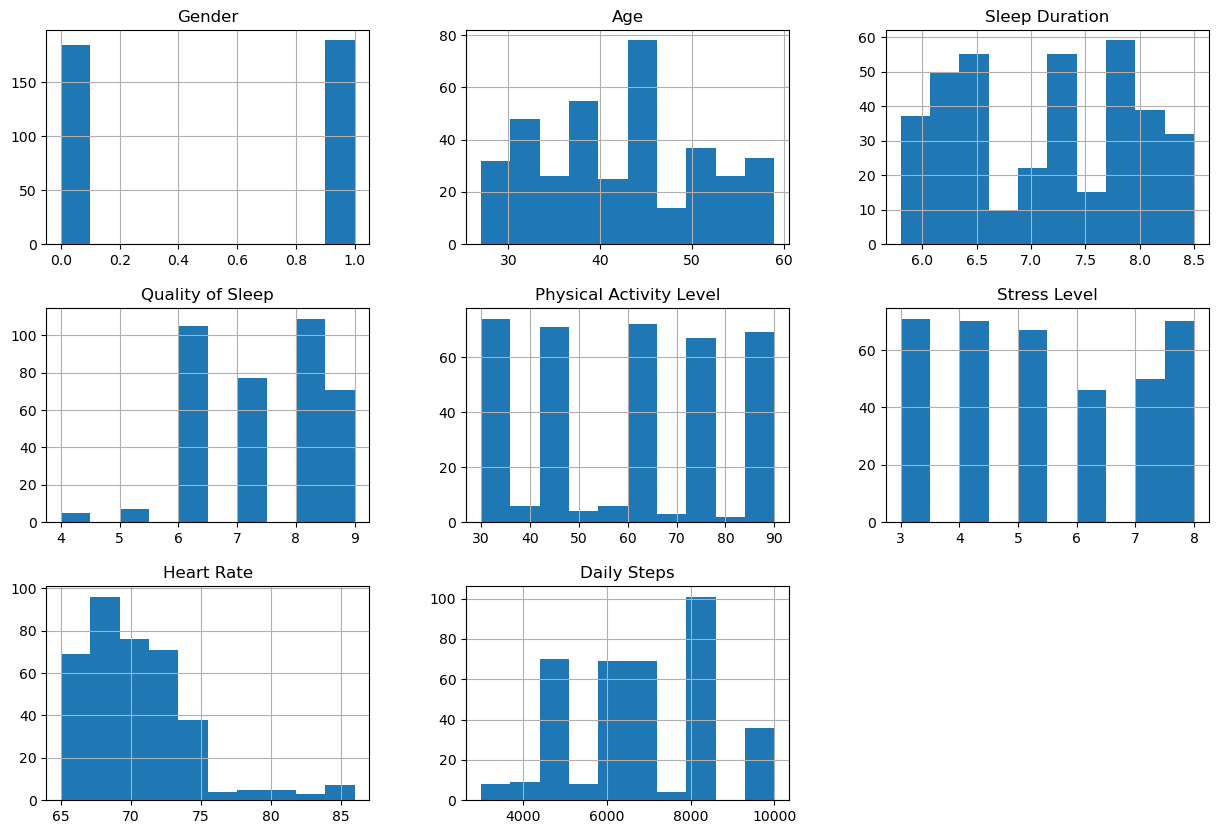

In [152]:
df.hist(bins=10, figsize=(15, 10))

<Axes: >

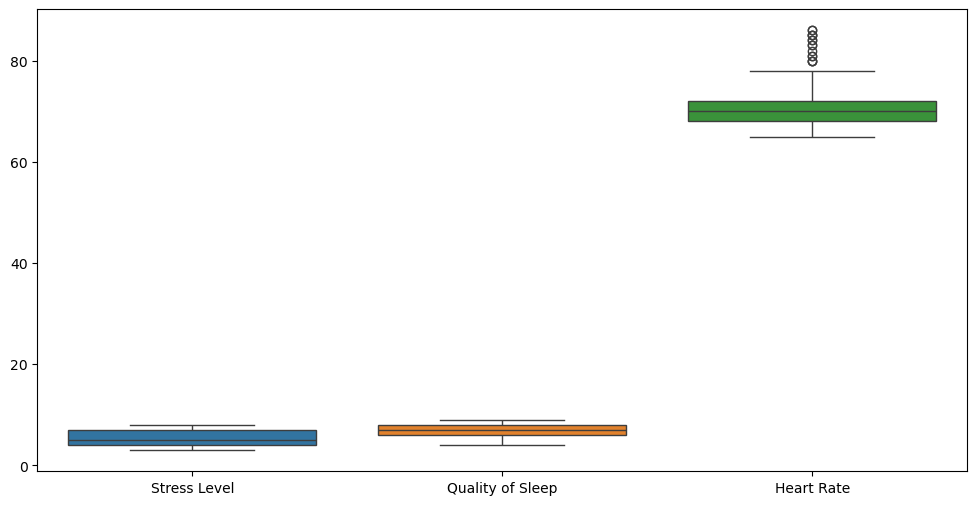

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Stress Level', 'Quality of Sleep', 'Heart Rate']])

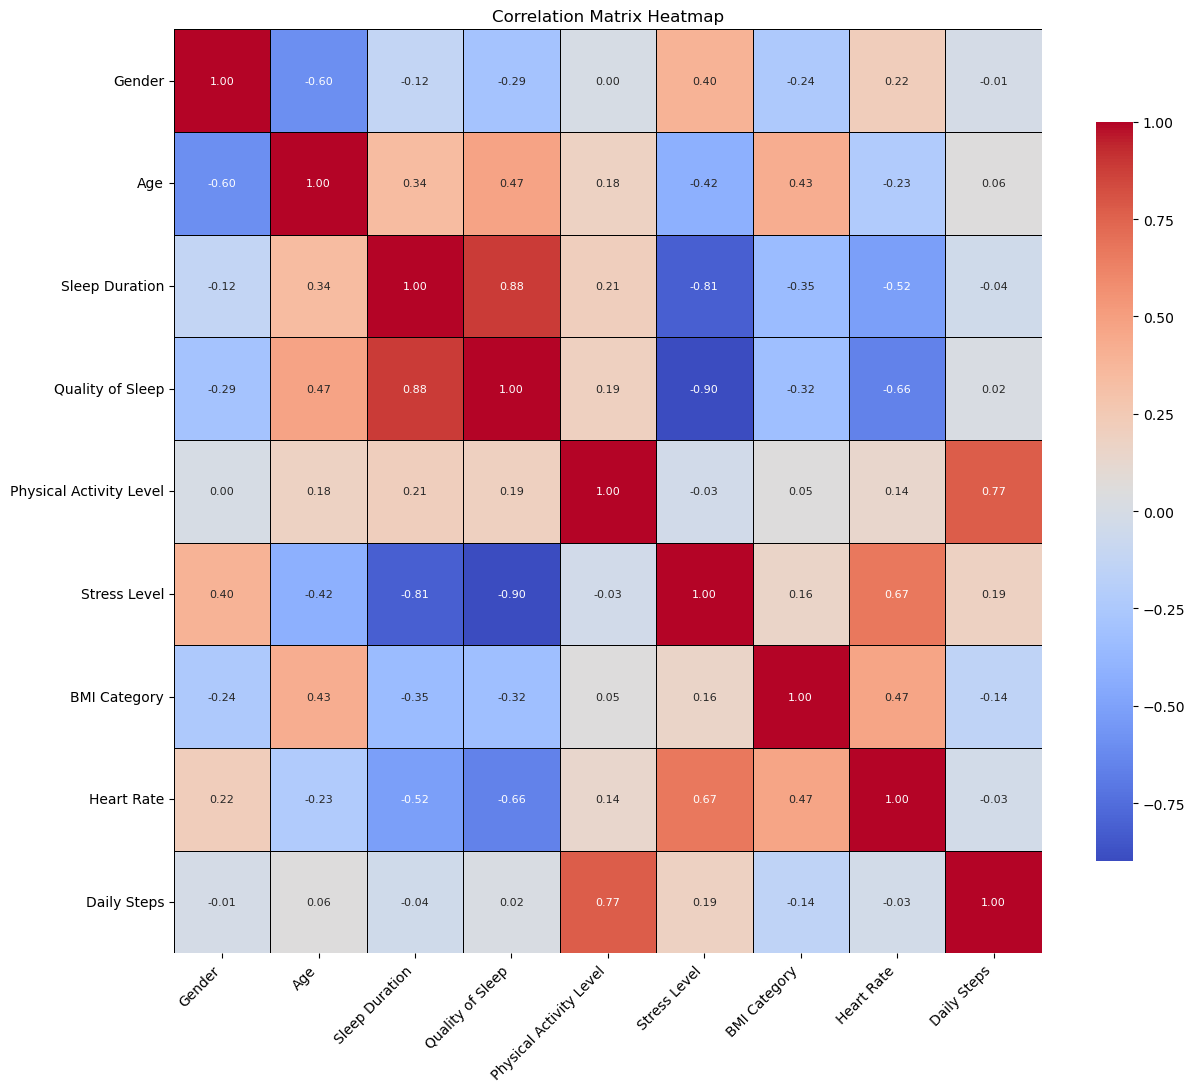

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(14, 12))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            annot_kws={"size": 8}, cbar_kws={"shrink": .8}, 
            linewidths=.5, linecolor='black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix Heatmap')

plt.show()

#### Feature Engineering

**Defining features, target and Train test split:**

In [155]:
# Define features and target
X = df.drop('Stress Level', axis=1) # Features
y = df['Stress Level'] # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Gradient Boosting Regressor:**

In [156]:
# Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [157]:
# Select top features based on importance
feature_importances = gbr.feature_importances_
top_features_idx = np.argsort(feature_importances)[-10:]  # Indices of top 10 features
top_features_names = X_train.columns[top_features_idx]  # Assuming X_train is a DataFrame
top_features_importances = feature_importances[top_features_idx]

# Create a DataFrame to display the top features and their importances
top_features_df = pd.DataFrame({
    'Feature': top_features_names,
    'Importance': top_features_importances
})

top_features_df

,Feature,Importance
0,BMI Category,0.000797
1,Age,0.013069
2,Gender,0.013685
3,Daily Steps,0.013730
4,Physical Activity Level,0.015540
5,Sleep Duration,0.053387
6,Heart Rate,0.112919
7,Quality of Sleep,0.776873


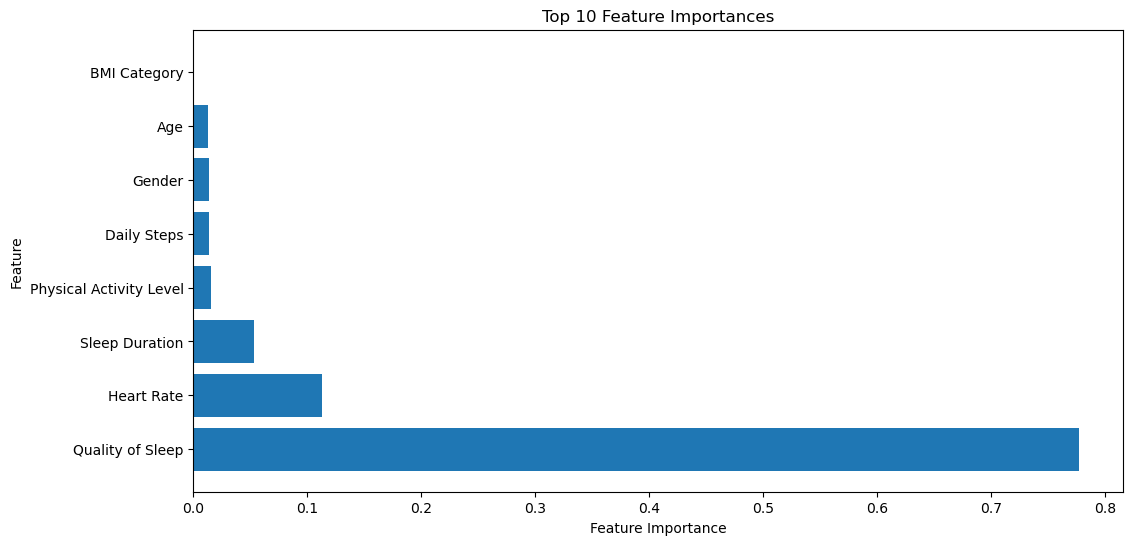

In [158]:
# Plot the Top features based on importance

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_features_names, top_features_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

#### Model Evaluation

**Cross-Validation**

In [159]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

# Calculate cross-validated scores (assuming it's a classification problem)
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Take the absolute values of the negative scores
cv_rmse = -cv_scores

print(f"Cross-validated RMSE scores: {cv_rmse}")
print(f"Mean RMSE: {cv_rmse.mean()}")

Cross-validated RMSE scores: [0.85848972 0.77788248 0.58143563 0.4263736  0.45910368]
Mean RMSE: 0.620657023529357


#### Model Tuning

**Hyperparameter Tuning:**

In [160]:
from sklearn.model_selection import RandomizedSearchCV
"""
# Define parameter grid
param_grid = {
    'n_estimators': [50, 1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}
"""

grid = {"n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 1000)],
        "learning_rate": [x for x in np.linspace(start = 0.1, stop = 1.0, num = 100)],
        "max_depth":[int(x) for x in np.linspace(start=1, stop=100, num = 100)]}

# Initialize RandomizedSearchCV and fitting it
random_search = RandomizedSearchCV(estimator=gbr, n_iter=100, param_distributions=grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Update model with best parameters
gbr_best = GradientBoostingRegressor(**best_params)
gbr_best.fit(X_train, y_train)

Best parameters found:  {'n_estimators': 922, 'max_depth': 4, 'learning_rate': 0.1090909090909091}


GradientBoostingRegressor(learning_rate=0.1090909090909091, max_depth=4,
                          n_estimators=922)

#### Imbalanced Data Handling

In [161]:
# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Check class distribution
print(train_data['Stress Level'].value_counts())

Stress Level
4    60
3    59
8    53
5    53
7    38
6    36
Name: count, dtype: int64


In [162]:
from sklearn.utils import resample

# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Sample the class with the highest count as majority class for balance
majority_class_count = train_data['Stress Level'].value_counts().max()
majority_class = train_data[train_data['Stress Level'] == 4]  # Adjust based on your data

# Upsample each class to match the majority class count
balanced_classes = []
for label in train_data['Stress Level'].unique():
    class_samples = train_data[train_data['Stress Level'] == label]
    class_samples_upsampled = resample(class_samples, 
                                       replace=True, 
                                       n_samples=majority_class_count, 
                                       random_state=42)
    balanced_classes.append(class_samples_upsampled)

# Combine all upsampled classes into a new training dataset
train_data_balanced = pd.concat(balanced_classes)

# Separate X and y from the balanced training data
X_train_balanced = train_data_balanced.drop('Stress Level', axis=1)
y_train_balanced = train_data_balanced['Stress Level']

# Verify new class distribution
print(y_train_balanced.value_counts())

Stress Level
7    60
8    60
5    60
3    60
6    60
4    60
Name: count, dtype: int64


**Proceeding with Model Training:**

In [163]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = gbr_best.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Root Mean Squared Error (RMSE): 0.04987410421695235
Mean Absolute Error (MAE): 0.008240791353637467
R-squared (R^2): 0.9992038367601644


**Make predictions**

In [164]:
# Ejemplo de datos de entrada para la predicción
nuevos_datos = pd.DataFrame({
    'Gender': [1],
    'Age': [30],
    'Sleep Duration': [8.0],
    'Quality of Sleep': [2.0],
    'Physical Activity Level': [0],
    'BMI Category': [1],
    'Heart Rate': [110],
    'Daily Steps': [8000],
    'Sleep Disorder': [1],
    'Systolic_BP': [120],
    'Diastolic_BP': [80]
})

# Asegúrate de que los datos de entrada tengan las mismas columnas que el conjunto de entrenamiento
nuevos_datos = nuevos_datos[X_train.columns]

# Realizar la predicción
prediccion = gbr_best.predict(nuevos_datos)

print(f"Predicción del nivel de estrés: {prediccion[0].round()}")

Predicción del nivel de estrés: 7.0
